# 04. KNN (k-Nearest Neighbor; k-최근접 이웃)

<hr><br>

## ✅KNN
- 특정 공간 내에서 입력과 제일 근접한 k개의 요소를 찾아, 더 많이 일치하는 것으로 분류하는 알고리즘
- 데이터 분류에 사용되는 아주 간단한 지도학습 알고리즘
    - 지도학습: 머신러닝 학습 시 데이터와 함께 데이터에 대한 레이블(label; 정답)을 함께 부여하는 학습 방식
    - 데이터 분류: 새로운 데이터를 기존 데이터의 레이블 중 하나로 분류하는 작업

<br>

- 유사한 특성을 가진 데이터끼리는 거리가 가깝고, 거리 공식을 사용하여 데이터 사이의 거리를 구할 수 있음
- 분류기의 효과를 높이기 위해 **파라미터를 조정** 할 수 있음
- KNN의 경우 k값을 변경할 수 있음
- 분류기가 부적절하게 학습되면 overfitting 또는 underfitting이 나타날 수 있음
- KNN의 경우 너무 **작은 k는 overfitting**, 너무 **큰 k는 underfitting**을 야기

<br>

#### 장점
- 구현이 쉽다
- 알고리즘을 이해하기 쉽다
- 별도의 모델학습이 필요 없다
- 하이퍼파라미터가 적다 (이웃의 개수, k)

<br>

#### 단점
- 예측의 속도가 느리다
- 메모리를 많이 쓴다
- 노이즈 데이터에 예민하다

<hr>

## 00. 기본 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지는 출력되지 않게 합니다.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 주피터 노트북에서 그래프가 보이는 설정
%matplotlib notebook

In [3]:
# 한글 font 설정

import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [4]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
# sklearn 모델의 동일한 결과 출력을 위해 seed 설정
np.random.seed(1234)

<hr>

## 01. 데이터 가져오기
#### 01_EDA에서 만든 train/test 데이터셋

In [6]:
train = pd.read_csv("data/train.csv", encoding='cp949')
test = pd.read_csv('data/test.csv', encoding='cp949')
train.head(3)

,Player,Pos,3P,TRB,BLK
0,Mason Plumlee,C,0.0,7.5,1.1
1,Georgios Papagiannis,C,0.0,3.9,0.8
2,Andrew Bogut,C,0.0,8.1,0.9


In [7]:
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (80, 5)
test shape: (20, 5)


<hr>

## 02. 최적의 k 찾기 (교차검증; corss validation)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [9]:
# 최적의 k값 찾기
max_k_range = train.shape[0] // 2  # 40
k_list = []

# 3부터 max_k_range까지 step을 두 개씩 증가시키면서 찾기
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_score = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (80, 3)
y_train shape: (80, 1)


In [10]:
# k-fold corss validation (k-폴드 교차검증법)
# - 모든 데이터를 훈련용, 검증용으로 모두 사용할 수 있다는 장점
for k in k_list: # 3, 5, 7, ..., 39
    knn = KNeighborsClassifier(n_neighbors=k)
    # 데이터를 몇 등분 할 것인지: cv
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    # 10번 반복한 scores의 평균을 cross_validation_score에 저장
    cross_validation_score.append(scores.mean())

# 여기서 가장 높은 정확도를 보이는 k값이 최적의 k
cross_validation_score

## nan은 k=37, 39일 경우 >> 해당 데이터가 너무 과대적합되어 발산되었다는 의미

[0.8875,
 0.9,
 0.9125,
 0.9125,
 0.925,
 0.9,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.875,
 0.85]

<IPython.core.display.Javascript object>


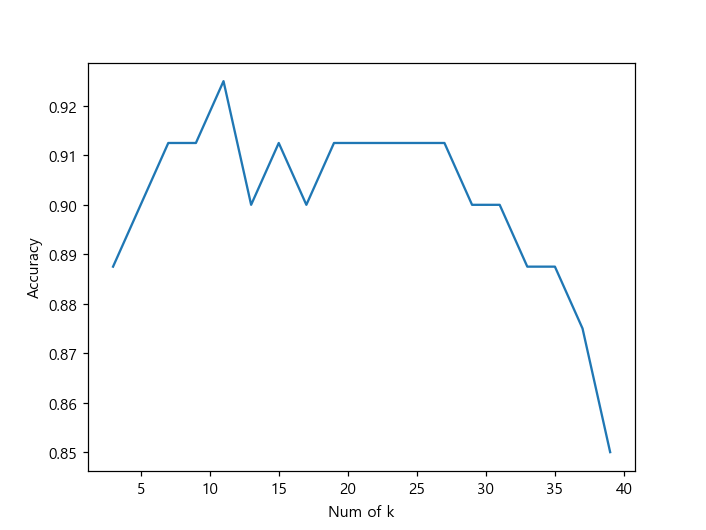

Text(0, 0.5, 'Accuracy')

In [11]:
# k값 시각화
plt.plot(k_list, cross_validation_score)
plt.xlabel("Num of k")
plt.ylabel("Accuracy")

# k=11일 때 평균이 0.925로 가장 높음

In [12]:
plt.close('all')

In [13]:
# 정확도가 가장 높은 k값 찾기
cvs = cross_validation_score

# cross_validation_score에서 최댓값의 인덱스
k = k_list[cvs.index(max(cross_validation_score))]
k

11

## 03. 두 개의 특징으로 예측하기 (3점슛, 블로킹)

In [14]:
# k=11일 때 예측모델 생성
knn = KNeighborsClassifier(n_neighbors=k)

In [15]:
x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

# ravel(): y_train 값은 1차원 배열로 변환
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=11)

In [16]:
# 평가 데이터 
x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)
pred

array(['SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG',
       'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'SG'], dtype=object)

In [17]:
result = pd.DataFrame({'예측값':pred, '정답':y_test.values.ravel()})
result.head(3)

,예측값,정답
0,SG,SG
1,C,C
2,SG,SG


In [18]:
from sklearn.metrics import accuracy_score

# 정확도
acc = accuracy_score(pred, y_test.values.ravel())
acc

1.0

<hr>

## 04. 세 개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [19]:
# k=11일 때 예측모델 생성
knn = KNeighborsClassifier(n_neighbors=k)

In [20]:
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# ravel(): y_train 값은 1차원 배열로 변환
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=11)

In [21]:
# 평가 데이터 
x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)
pred

array(['SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG',
       'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'SG'], dtype=object)

In [22]:
result = pd.DataFrame({'예측값':pred, '정답':y_test.values.ravel()})
result.head(3)

,예측값,정답
0,SG,SG
1,C,C
2,SG,SG


In [23]:
# 정확도
acc = accuracy_score(pred, y_test.values.ravel())
acc

0.95

<hr>

## 05. 3D 그래프 시각화 테스트

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [25]:
#'Pos' 값이 'C' >> 0, 'SG' >> 1
train['Pos_num'] = np.where(train['Pos'] == 'C', 0, 
                            np.where(train['Pos'] == 'SG', 1, np.nan))
train.head()

,Player,Pos,3P,TRB,BLK,Pos_num
0,Mason Plumlee,C,0.0,7.5,1.1,0.0
1,Georgios Papagiannis,C,0.0,3.9,0.8,0.0
2,Andrew Bogut,C,0.0,8.1,0.9,0.0
3,Willie Reed,C,0.0,4.7,0.7,0.0
4,Patrick Beverley,SG,1.6,5.9,0.4,1.0


<IPython.core.display.Javascript object>


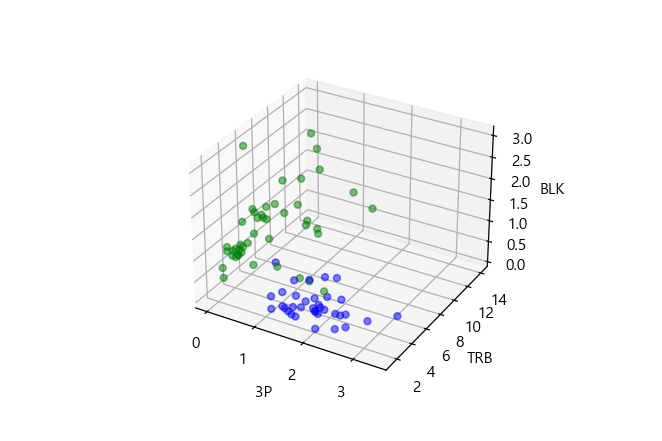

In [26]:
# 3D scatter plot
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')

# 색상 지정
colors = ['g' if val == 0 else 'b' for val in train['Pos_num']]

scatter = ax.scatter(train['3P'], train['TRB'], train['BLK'], 
                     c=colors, alpha=0.5)

ax.set_xlabel('3P')
ax.set_ylabel('TRB')
ax.set_zlabel('BLK')

plt.show()

In [27]:
plt.close('all')